Here is my first step: data cleaning & exploration
Finding invalid,weird values, finding important features, structure

Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv('claims_train.csv')
test = pd.read_csv('claims_test.csv')

print(f"Train dataset has {train.shape[0]} entries, test dataset has {test.shape[0]} entries")

Train dataset has 542410 entries, test dataset has 135603 entries


Checking values

In [3]:
train.isna().sum() # checking if there are any Nan values
test.isna().sum()  # checking if there are any Nan values

print(train.duplicated().sum()) #checking if duplicated
print(test.duplicated().sum())  #checking if duplicated

train['Exposure'].describe() # checking that Exposure >0 and <=1; Found that max value is higher than 1
train[train['Exposure'] >1].shape[0] # 994 entries with Exposure > 1. Few entries, looks like noise
train = train[train['Exposure'] <= 1].copy() #Decided to delete the noise
test['Exposure'].describe() #same for test. again some entries with values > 1
test[test['Exposure'] >1].shape[0] #230 entries that are noise
test =test[test['Exposure']<1].copy()

train['VehGas'].unique() # checked categoric feature
train[['DrivAge', 'VehAge', 'VehPower', 'BonusMalus']].describe() # checking numeric values , seems fine. no negative values



0
0


,DrivAge,VehAge,VehPower,BonusMalus
count,541416.000000,541416.000000,541416.000000,541416.000000
mean,45.502983,7.043473,6.452726,59.766195
std,14.137967,5.659153,2.050219,15.645146
min,18.000000,0.000000,4.000000,50.000000
25%,34.000000,2.000000,5.000000,50.000000
50%,44.000000,6.000000,6.000000,50.000000
75%,55.000000,11.000000,7.000000,64.000000
max,100.000000,100.000000,15.000000,230.000000


Some simple visualization

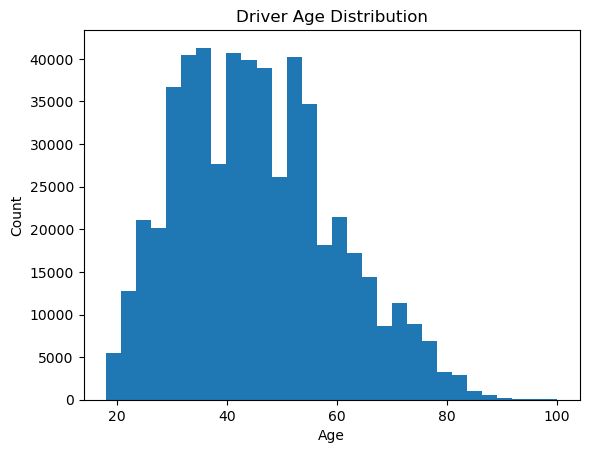

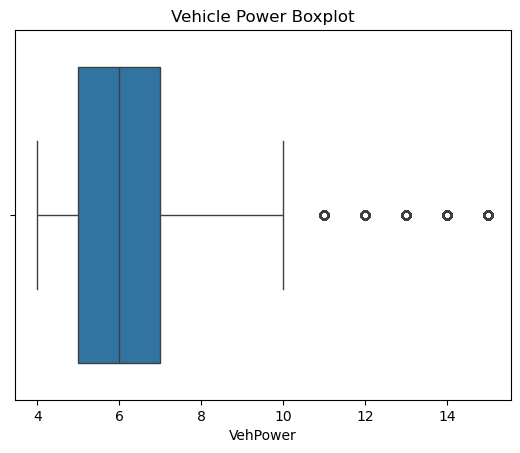

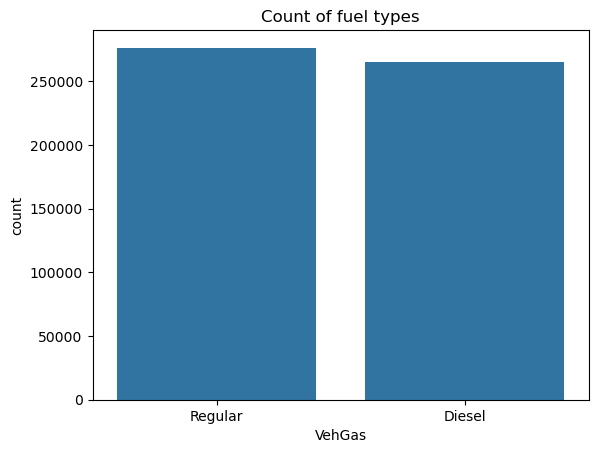

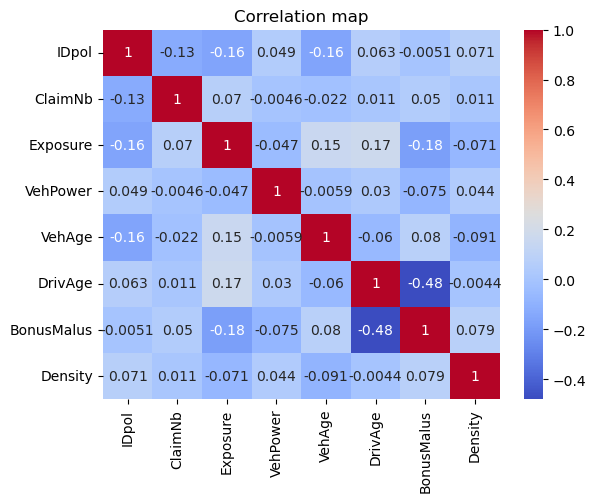

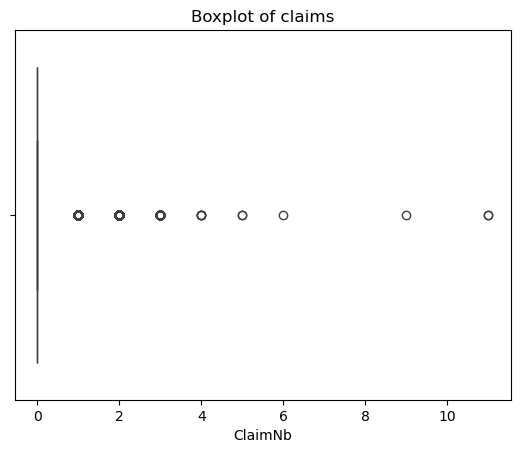

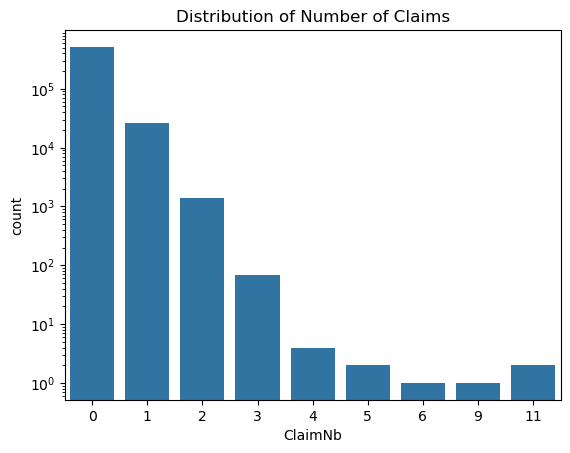

In [ ]:
 #histogram of drivers age
plt.hist(train['DrivAge'],bins=30)  
plt.title('Driver Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
 #boxplot of VehPower 
sns.boxplot(x=train['VehPower'])
plt.title('Vehicle Power Boxplot')
plt.show()
# Count of fuel types
sns.countplot(x=train['VehGas'])
plt.title('Count of fuel types')
plt.show()
# Heatmap of correlation of features     Noticed a neagative moderate correlation between driver age and BonusMalus, to be expected
corr=train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation map')
plt.show()
#Boxplot of claims  Noticed that almost everyone has 0 claims
sns.boxplot(x=train['ClaimNb'])
plt.title('Boxplot of claims')
plt.show()
#Count plot with log scale on Y to see more clearly
sns.countplot(x='ClaimNb', data=train)
plt.yscale('log')  # use log scale to see rare values clearly
plt.title('Distribution of Number of Claims')
plt.show()

Adding 'Risk' column to datasets, target variable. Deleting ClaimNb and Exposure, since they are encoded in Risk

In [9]:
train['Risk'] = train['ClaimNb'] / train['Exposure']
test['Risk'] =  test['ClaimNb'] / test['Exposure']
train.drop(columns=['ClaimNb', 'Exposure'])
test.drop(columns=['ClaimNb', 'Exposure'])
train.head()




,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Risk
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24,0.0
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25,0.0
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82,0.0
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24,0.0
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53,0.0
